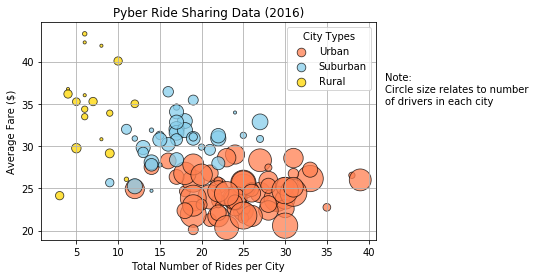

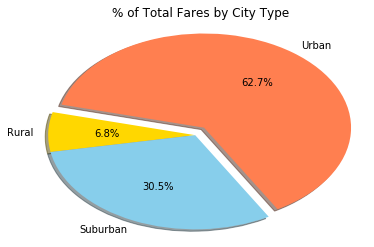

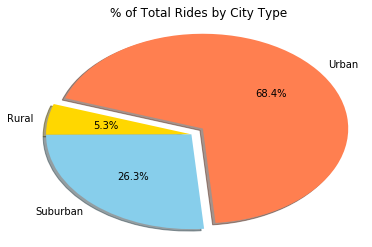

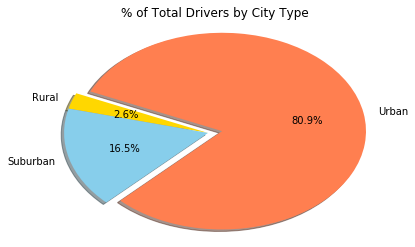

In [12]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydf= pd.read_csv(city_data_to_load)
ridedf= pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
total_df = pd.merge(citydf,ridedf, how= 'outer')

# Display the data table for preview
total_df.head()

# Split datasets by city type
u = 'Urban'

udf = total_df[total_df['type'] == u]

s = 'Suburban'

sdf = total_df[total_df['type'] == s]

r = 'Rural'

rdf = total_df[total_df['type'] == r]


# Obtain the x and y coordinates for each of the three city types
# set 'groupby' to find info for each city
# Urban
udf_city = udf.groupby('city')
udf_fare = udf_city['fare'].mean()
udf_rides = udf_city['ride_id'].count()
udf_drivers = udf_city['driver_count'].max()



# Suburban
sdf_city = sdf.groupby('city')
sdf_fare = sdf_city['fare'].mean()
sdf_rides = sdf_city['ride_id'].count()
sdf_drivers = sdf_city['driver_count'].max()

#Rural
rdf_city = rdf.groupby('city')
rdf_fare = rdf_city['fare'].mean()
rdf_rides = rdf_city['ride_id'].count()
rdf_drivers = rdf_city['driver_count'].max()

# Build the scatter plots for each city types
plt.scatter(udf_rides, udf_fare, udf_drivers*10, alpha = 0.75, color = 'coral', edgecolor = 'black', linewidth = 0.8, label = 'Urban')
plt.scatter(sdf_rides, sdf_fare, sdf_drivers*10, alpha = 0.75, color = 'skyblue', edgecolor = 'black', linewidth = 0.8, label = 'Suburban')
plt.scatter(rdf_rides, rdf_fare, rdf_drivers*10, alpha = 0.75, color = 'gold', edgecolor = 'black', linewidth = 0.8, label = 'Rural')

# Incorporate the other graph properties
plt.grid()
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides per City')
plt.ylabel('Average Fare ($)')

# Incorporate a text label regarding circle size
plt.text(42, 35, 'Note:\nCircle size relates to number\nof drivers in each city', dict(size=10))

# Create a legend
plt.legend(loc = 'upper right', title= 'City Types') 
lgnd = plt.legend(loc="upper right", title = 'City Types', scatterpoints=1, fontsize=10)
for handle in lgnd.legendHandles:
    handle.set_sizes([75])
# Show plot
plt.show()

## Bubble Plot of Ride Sharing Data

## Total Fares by City Type

upie_fares = udf_city['fare'].sum()
upie_fares = upie_fares.sum()
spie_fares = sdf_city['fare'].sum()
spie_fares = spie_fares.sum()
rpie_fares = rdf_city['fare'].sum()
rpie_fares=rpie_fares.sum()

# Calculate Type Percents
labels = 'Urban', 'Rural', 'Suburban'
sizes = [upie_fares, rpie_fares, spie_fares]
explode = (0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ["Coral", "Gold","Skyblue"]

fig1, ax1 = plt.subplots()

# Build Pie Chart
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, colors = colors, startangle=300)
ax1.axis('tight')
plt.title('% of Total Fares by City Type')
plt.show()

## Total Rides by City Type

# Calculate Ride Percents
upie_rides = udf_rides.sum()
spie_rides = sdf_rides.sum()
rpie_rides = rdf_rides.sum()

labels = 'Urban', 'Rural', 'Suburban'

sizes = [upie_rides, rpie_rides, spie_rides]

explode = (0.1, 0, 0)

colors = ["Coral", "Gold","Skyblue"]

fig1, ax1 = plt.subplots()

# Build Pie Chart
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, colors = colors, startangle=275)
ax1.axis('tight')
plt.title('% of Total Rides by City Type')
plt.show()

## Total Drivers by City Type

# Calculate Driver Percents
upie_drivers = udf_drivers.sum()
spie_drivers = sdf_drivers.sum()
rpie_drivers = rdf_drivers.sum()

labels = 'Urban', 'Rural', 'Suburban'

sizes = [upie_drivers, rpie_drivers, spie_drivers]

explode = (0.1, 0, 0)

colors = ["Coral", "Gold","Skyblue"]

fig1, ax1 = plt.subplots()

# Build Pie Charts
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, colors = colors, startangle=225)
ax1.axis('tight')
plt.title('% of Total Drivers by City Type')
plt.show()